[![Binder](https://mybinder.org/badge_logo.svg)](https://lab.mlpack.org/v2/gh/mlpack/examples/master?urlpath=lab%2Ftree%2Fbreast_cancer_wisconsin_transformation_with_pca%2Fbreast-cancer-wisconsin-pca-py.ipynb)

In [1]:
# @file breast-cancer-wisconsin-pca-py.ipynb
#
# A simple example usage of Principal Component Analysis (PCA)
# applied to the UCI Breast Cancer dataset.
#
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [2]:
import mlpack

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# Load the Breast Cancer data from an online URL.
data = pd.read_csv('https://datasets.mlpack.org/breast-cancer-wisconsin.csv', header=None)

In [5]:
# Print the first 10 rows of the input data. The data has 569 samples with 29
# features and each sample has a label either 0.0 (Benign) or 1.0 (Malignant).
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
7,7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0.0
8,8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0.0
9,9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0.0


In [6]:
# Split the labels and ids (first and last column).
labels = data[data.columns[31]]
dataset = data[data.columns[1:31]]

In [7]:
# Perform Principal Components Analysis using the exact method.
# Other decomposition methods are 'randomized', 'randomized-block-krylov', 'quic'.
#
# For more information checkout https://www.mlpack.org/doc/stable/python_documentation.html#pca
# or uncomment the line below.
# mlpack.pca?
data = mlpack.pca(decomposition_method='exact', scale=True, input_=dataset, new_dimensionality=2)

In [8]:
# Print the first ten columns of the transformed input.
data['output'][1:10]

array([[ -2.38570263,   3.76485906],
       [ -5.72885549,   1.07422859],
       [ -7.11669126, -10.26655564],
       [ -3.93184247,   1.94635898],
       [ -2.37815462,  -3.94645643],
       [ -2.23691506,   2.68766641],
       [ -2.14141428,  -2.33818665],
       [ -3.17213315,  -3.38883114],
       [ -6.34616284,  -7.72038095]])

<Figure size 432x288 with 0 Axes>

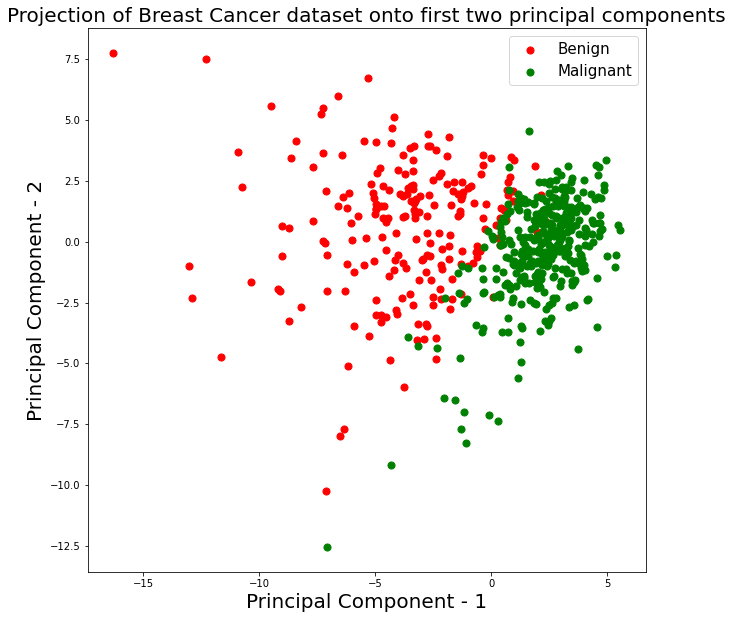

In [9]:
# Plot the transformed input.
plt.figure()
plt.figure(figsize=(10, 10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.title('Projection of Breast Cancer dataset onto first two principal components', fontsize=20)

targets = [0.0, 1.0] # Benign: 0.0, Malignant: 1.0
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indices = labels == target
    plt.scatter(data['output'][indices,[0]], data['output'][indices,[1]], c=color, s=50)
plt.legend(['Benign', 'Malignant'], prop={'size': 15});

We can observe that the two classes Benign and Malignant, when projected to a two-dimensional space,
can be linearly separable up to some extent. Also we can observe that the Benign class is spread
out as compared to the Malignant class.